bruder ehrlih kp, was das hier soll...

01:05:22 - cmdstanpy - INFO - Chain [1] start processing
01:05:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


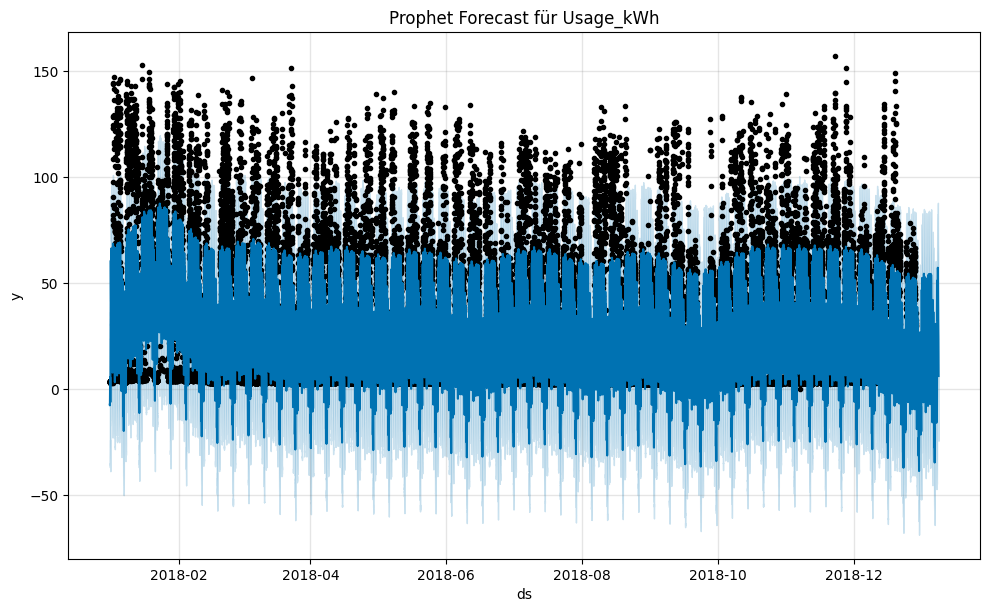

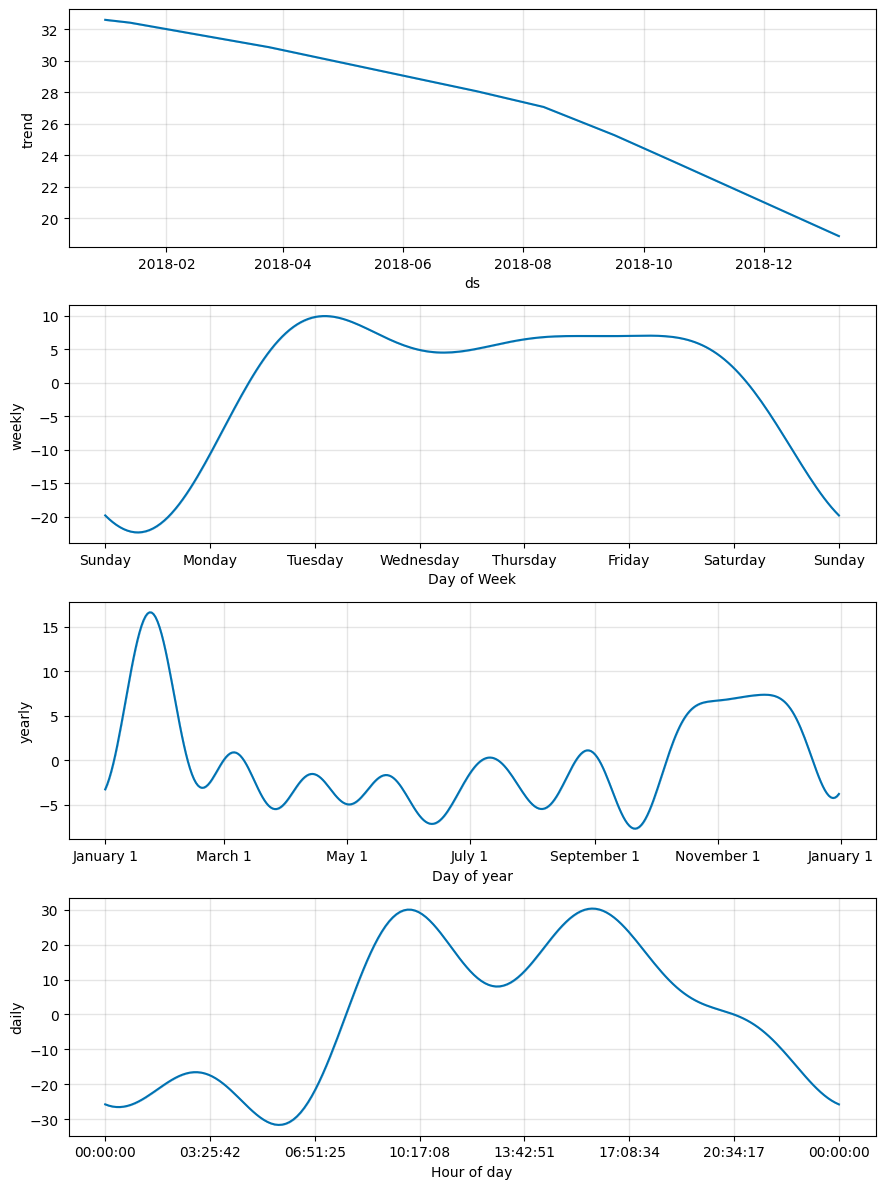

,ds,yhat,yhat_lower,yhat_upper
35198,2019-01-07 14:45:00,49.832059,18.619703,80.453979
35199,2019-01-07 15:45:00,57.335706,29.163649,87.138496
35200,2019-01-07 16:45:00,54.903965,26.124389,87.948295
35201,2019-01-07 17:45:00,45.460258,13.851066,73.495301
35202,2019-01-07 18:45:00,36.436276,7.425822,67.686024
35203,2019-01-07 19:45:00,31.921855,3.390214,64.481585
35204,2019-01-07 20:45:00,29.376948,-2.801595,59.371057
35205,2019-01-07 21:45:00,23.815430,-9.025778,53.999048
35206,2019-01-07 22:45:00,14.436289,-15.162289,43.177939
35207,2019-01-07 23:45:00,6.270361,-24.203552,37.043882


In [4]:
# 1. Bibliotheken importieren
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 2. Daten einlesen
# Hier anpassen, falls du die CSV-Datei laden musst
df = pd.read_csv('../../data/steel_industry_data.csv')

# Annahme: df liegt bereits vor
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# 3. Für Prophet vorbereiten
prophet_df = df[['date', 'Usage_kWh']].rename(columns={'date': 'ds', 'Usage_kWh': 'y'})

# 4. Prophet Modell erstellen und fitten
model = Prophet(
    daily_seasonality=True,   # tägliche Saisonalität
    weekly_seasonality=True,  # wöchentliche Saisonalität
    yearly_seasonality=True   # jährliche Saisonalität
)
model.fit(prophet_df)

# 5. Zukunftsdaten erstellen (z.B. Vorhersage für 7 Tage)
future = model.make_future_dataframe(periods=7*24, freq='H')  # stündliche Vorhersage für 7 Tage
forecast = model.predict(future)

# 6. Ergebnisse plotten
fig1 = model.plot(forecast)
plt.title('Prophet Forecast für Usage_kWh')
plt.show()

# 7. Komponentenplot (Trend, Saisonalität)
fig2 = model.plot_components(forecast)
plt.show()

# 8. Optional: Forecast ansehen
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
